In [1]:
import numpy as np
import pandas as pd
import os
import re
import random

In [ ]:
save_path = "/data/yuqihang/datasets/collm-datasets/bookdu"
train_ = pd.read_pickle(os.path.join(save_path,"train_ood2.pkl"))
# valid_ = pd.read_pickle(os.path.join(save_path,"valid_ood2.pkl"))
test_ = pd.read_pickle(os.path.join(save_path,"test_tiny_ood2.pkl"))
# test_small = pd.read_pickle(os.path.join(save_path,"test_small_ood2.pkl"))
# valid_small = pd.read_pickle(os.path.join(save_path,"valid_small_ood2.pkl"))
# data = pd.concat([train_,valid_,test_],axis=0)
# reason_ = pd.read_pickle(os.path.join(save_path,"reason_ood2.pkl"))

In [3]:
test_.shape

(80, 8)

In [32]:
test_ = test_.sort_values(by=['uid','iid']).reset_index(drop=True)

In [33]:
test_.to_pickle(os.path.join(save_path,"test_tiny_ood2.pkl"))

In [7]:
test_

,uid,iid,label,timestamp,his,flag,his_label,not_cold
0,1035,2717,1,1.512086e+09,"[0, 29769, 25937, 10058, 10968, 43851, 24594, ...",1.0,"[0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, ...",1
1,1035,4827,1,1.511914e+09,"[0, 29769, 25937, 10058, 10968, 43851, 24594, ...",1.0,"[0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, ...",1
2,1035,6436,1,1.513555e+09,"[0, 29769, 25937, 10058, 10968, 43851, 24594, ...",1.0,"[0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, ...",1
3,1035,6454,1,1.512432e+09,"[0, 29769, 25937, 10058, 10968, 43851, 24594, ...",1.0,"[0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, ...",1
4,1035,11953,1,1.514246e+09,"[0, 29769, 25937, 10058, 10968, 43851, 24594, ...",1.0,"[0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, ...",1
...,...,...,...,...,...,...,...,...
75,22120,29912,0,1.512346e+09,"[0, 30110, 45574, 30154, 45719, 45645, 29226, ...",1.0,"[0, 0, 0, 0, 1, 1, 1, 1, 1]",0
76,22120,36610,1,1.512086e+09,"[0, 30110, 45574, 30154, 45719, 45645, 29226]",1.0,"[0, 0, 0, 0, 1, 1, 1]",0
77,22120,45442,0,1.513728e+09,"[0, 30110, 45574, 30154, 45719, 45645, 29226, ...",1.0,"[0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1]",0
78,22120,45856,1,1.512432e+09,"[0, 30110, 45574, 30154, 45719, 45645, 29226, ...",1.0,"[0, 0, 0, 0, 1, 1, 1, 1, 1, 0]",0


In [22]:
train_.head()

,uid,iid,label,timestamp,his,flag,not_cold
698251,20104,30972,1,1.512346e+09,"[0, 33375, 33721, 33504, 33455, 33991, 34058, ...",1.0,1
191171,5804,6570,0,1.513555e+09,"[0, 1609, 8763, 9348, 9400, 43548, 17293, 3532...",1.0,1
74457,2176,1837,0,1.512605e+09,"[0, 15286, 26981, 3149, 20693, 7564, 15057, 22...",1.0,1
218630,6571,45668,1,1.514246e+09,"[0, 43292, 43293, 42365, 31960, 43291, 27885, ...",1.0,0
16089,569,114,0,1.512432e+09,"[0, 30554, 22634, 34250, 28591, 34298, 46120, ...",1.0,1


In [24]:
train_.head()

,uid,iid,label,timestamp,his,flag,his_label,not_cold
455109,13299,45904,1,1.513210e+09,"[0, 33966, 29857, 32477, 41217, 18747, 34882, ...",1.0,"[0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, ...",0
312201,8766,24293,1,1.513901e+09,"[0, 27404, 27500, 27539, 27529, 27479]",1.0,"[0, 1, 1, 1, 1, 1]",0
30223,1035,4827,1,1.511914e+09,"[0, 29769, 25937, 10058, 10968, 43851, 24594, ...",1.0,"[0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, ...",1
483645,13829,35251,1,1.511914e+09,"[0, 18626, 33498, 33500, 27577, 31582, 33458, ...",1.0,"[0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, ...",0
30228,1035,21413,0,1.512950e+09,"[0, 29769, 25937, 10058, 10968, 43851, 24594, ...",1.0,"[0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, ...",1


In [3]:
import os
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

In [91]:
datasets = 'bookdu'
collm = 'sasrec'
save_path0 = f"/data/yuqihang/datasets/collm-datasets/{datasets}/{collm}/grouped_2/group_0"
save_path1 = f"/data/yuqihang/datasets/collm-datasets/{datasets}/{collm}/grouped_2/group_1"
train0 = pd.read_pickle(os.path.join(save_path0,"train_ood2.pkl"))
train1 = pd.read_pickle(os.path.join(save_path1,"train_ood2.pkl"))

In [92]:
group_A = np.array(train0.groupby('uid').size().reset_index(name='count')['count'].tolist())
group_B = np.array(train1.groupby('uid').size().reset_index(name='count')['count'].tolist())

print("组A均值:", np.mean(group_A), "组B均值:", np.mean(group_B))
print("组A方差:", np.var(group_A), "组B方差:", np.var(group_B))

_, p_a = stats.shapiro(group_A)
_, p_b = stats.shapiro(group_B)
if p_a > 0.05 and p_b > 0.05:
    # t检验
    t_stat, p_value = stats.ttest_ind(group_A, group_B)
    print(f"t检验p值:{p_value:.6f}")
else:
    # Mann-Whitney U检验
    u_stat, p_value = stats.mannwhitneyu(group_A, group_B)
    print(f"Mann-Whitney U检验p值:{p_value:.6f}")

# 5. 效应量（Cohen's d）
pooled_std = np.sqrt((np.var(group_A, ddof=1) + np.var(group_B, ddof=1)) / 2)
cohen_d = (np.mean(group_B) - np.mean(group_A)) / pooled_std
print(f"Cohen's d:{abs(cohen_d):.6f}")

# 6. KL散度（需分箱）
hist_A, bins = np.histogram(group_A, bins=10, density=True)
hist_B, _ = np.histogram(group_B, bins=bins, density=True)
kl_div = stats.entropy(hist_A + 1e-10, hist_B + 1e-10)  # 避免除零
print(f"KL散度:{kl_div:.6f}")

组A均值: 22.055150949268597 组B均值: 46.789050173556326
组A方差: 358.9808363684375 组B方差: 2090.07304513759
Mann-Whitney U检验p值:0.000000
Cohen's d:0.706769
KL散度:0.262276


/data/yuqihang/envs/envs/collm/lib/python3.9/site-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [ ]:
kl = {'Yelp':[0.009045,0.381418,0.004679],'Book':[0.007836,0.271544,0.262276]}
auc = {'Yelp':[0.6955,0.7151,0.6818],'Book':[0.8302,0.8349,0.8347]}

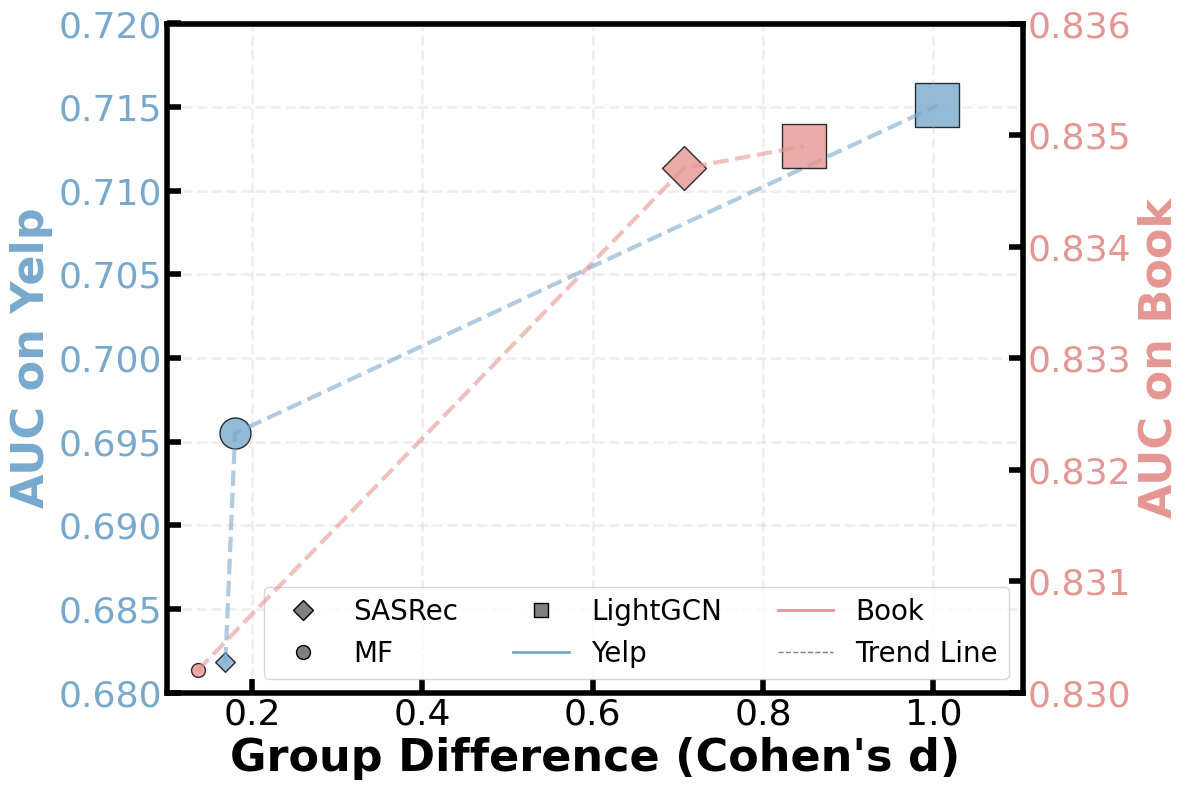

In [20]:
from tkinter import font
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# 数据准备
data = {
    "Dataset": ["Yelp", "Yelp", "Yelp", "Book", "Book", "Book"],
    "Method": ["LightGCN", "MF", "SASRec"]*2,
    "Difference": [1.004878, 0.179911,0.168531,0.848056,0.136125,0.706769],
    "Metric": [0.7151, 0.6955, 0.6818, 0.8349, 0.8302, 0.8347]       
}
df = pd.DataFrame(data)

# 创建画布和主坐标轴
fig, ax1 = plt.subplots(figsize=(12, 8))
ax2 = ax1.twinx()  # 创建共享x轴的第二个y轴

# 颜色和形状映射
legend_elements = []
colors = {"Yelp": '#78A9CD', "Book": "#E59693"}
markers = {"MF": "o", "LightGCN": "s", "SASRec": "D"}
sizes = {"Yelp": [100, 500, 1000], "Book": [100, 500, 1000]}  # 各数据集内部点大小

# ===== 绘制Yelp数据（左纵轴） =====
yelp_df = df[df.Dataset == "Yelp"].sort_values("Difference")
for i, (_, row) in enumerate(yelp_df.sort_values("Metric").iterrows()):
    ax1.scatter(row.Difference, row.Metric, 
                s=sizes["Yelp"][i], color=colors["Yelp"],
                marker=markers[row.Method], edgecolor='black',
                alpha=0.8, label=f"Yelp-{row.Method}")
    # 只添加一次方法图例
    if row.Method not in [l.get_label() for l in legend_elements]:
        legend_elements.append(
            plt.Line2D([0], [0], marker=markers[row.Method], color='w',
                       markerfacecolor='gray', markersize=10, label=row.Method,
                       markeredgecolor='black'))
        
ax1.plot(yelp_df.Difference, yelp_df.Metric, '--',  lw=3,
         color=colors["Yelp"], alpha=0.6)

# 设置左纵轴范围
ax1.set_ylim(0.68, 0.72)
ax1.set_ylabel("AUC on Yelp", fontsize=32, color=colors["Yelp"], fontweight='bold')
ax1.tick_params(axis='y', labelcolor=colors["Yelp"])

# ===== 绘制Book数据（右纵轴） =====
book_df = df[df.Dataset == "Book"].sort_values("Difference")
for i, (_, row) in enumerate(book_df.sort_values("Metric").iterrows()):
    ax2.scatter(row.Difference, row.Metric, 
                s=sizes["Book"][i], color=colors["Book"],
                marker=markers[row.Method], edgecolor='black',
                alpha=0.8, label=f"Book-{row.Method}")
ax2.plot(book_df.Difference, book_df.Metric, '--', lw=3,
         color=colors["Book"], alpha=0.6)

# 设置右纵轴范围
ax2.set_ylim(0.83, 0.836)
ax2.set_ylabel("AUC on Book", fontsize=32, color=colors["Book"], fontweight='bold')
ax2.tick_params(axis='y', labelcolor=colors["Book"])

# ===== 共享横轴设置 =====
x_min = min(df.Difference.min()*0.9, 0.1)  # 确保包含0
x_max = df.Difference.max()*1.1
ax1.set_xlim(x_min, x_max)
ax1.set_xlabel("Group Difference (Cohen's d)", fontsize=32, fontweight='bold')

# 添加数据集图例
legend_elements += [
    plt.Line2D([0], [0], color=colors["Yelp"], lw=2, label='Yelp'),
    plt.Line2D([0], [0], color=colors["Book"], lw=2, label='Book'),
    plt.Line2D([0], [0], color='gray', linestyle='--', lw=1, label='Trend Line')
]

# 创建统一图例
legend = ax1.legend(handles=legend_elements, 
                  loc='lower right',
                  ncol=3,
                  fontsize=20)
ax1.grid(False)
ax1.spines['top'].set_visible(True)     # 显示顶部边框
ax2.spines['right'].set_visible(True)   # 显示右侧边框
ax1.spines['bottom'].set_visible(True)  # 显示底部边框
ax1.spines['left'].set_visible(True)    # 显示左侧边框
# 可选：设置坐标轴粗细（宽度）
ax1.spines['top'].set_linewidth(4)
ax2.spines['right'].set_linewidth(4)
ax1.spines['bottom'].set_linewidth(4)
ax1.spines['left'].set_linewidth(4)
# 设置刻度线更粗
ax1.tick_params(axis='x', labelsize=26, direction='in',length=10,width=4)  # x轴刻度标签字号
ax1.tick_params(axis='y', labelsize=26, direction='in',length=10,width=4)  # 左y轴刻度标签字号
ax2.tick_params(axis='y', labelsize=26, direction='in',length=10,width=4)  # 右y轴刻度标签字号
ax1.grid(True, linestyle='--', alpha=0.2,lw=2, axis='both')  # 仅显示x轴网格线
plt.tight_layout()
plt.savefig("group_method.svg")

In [5]:
user_counts = train_.groupby('uid').size().reset_index(name='count')
user_counts['count'].tolist()

[1,
 11,
 26,
 13,
 4,
 18,
 167,
 28,
 32,
 20,
 1,
 20,
 3,
 43,
 14,
 126,
 220,
 159,
 4,
 132,
 8,
 96,
 9,
 27,
 8,
 4,
 1,
 80,
 68,
 63,
 174,
 120,
 1,
 81,
 36,
 98,
 17,
 64,
 12,
 10,
 380,
 113,
 43,
 16,
 4,
 104,
 29,
 1,
 5,
 3,
 110,
 338,
 57,
 27,
 1,
 219,
 11,
 41,
 44,
 2,
 111,
 66,
 129,
 128,
 58,
 102,
 15,
 29,
 146,
 199,
 149,
 120,
 71,
 39,
 11,
 15,
 416,
 445,
 65,
 101,
 211,
 6,
 54,
 28,
 4,
 154,
 114,
 7,
 38,
 114,
 14,
 3,
 37,
 134,
 34,
 20,
 26,
 29,
 42,
 52,
 52,
 1,
 13,
 2,
 57,
 7,
 10,
 9,
 6,
 3,
 35,
 1,
 6,
 10,
 19,
 22,
 25,
 46,
 250,
 39,
 22,
 86,
 180,
 1,
 96,
 16,
 5,
 15,
 27,
 7,
 8,
 37,
 1,
 16,
 29,
 2,
 40,
 33,
 1,
 11,
 18,
 3,
 4,
 6,
 14,
 1,
 44,
 10,
 9,
 2,
 475,
 2,
 11,
 39,
 6,
 21,
 37,
 189,
 39,
 1,
 13,
 16,
 1,
 23,
 4,
 8,
 59,
 115,
 21,
 66,
 14,
 74,
 41,
 52,
 9,
 4,
 40,
 125,
 13,
 18,
 4,
 55,
 101,
 91,
 81,
 44,
 47,
 5,
 156,
 52,
 17,
 13,
 30,
 1,
 5,
 25,
 55,
 22,
 142,
 9,
 6,
 16,
 59,
 30

In [63]:
train.shape,valid.shape, reason.shape

((9915, 8), (3002, 8), (293, 7))

In [26]:
test_small = test_.sample(frac=0.25,random_state=2025)

In [34]:
test_tiny = test_small.sample(n=80,random_state=2025)

In [35]:
test_tiny.head()

,uid,iid,label,timestamp,his,flag,his_label,not_cold
161029,5063,19891,1,1.512864e+09,"[0, 20647, 2070, 29386, 8807, 19883, 44401, 13...",1.0,"[0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1]",0
464855,13447,40327,1,1.513382e+09,"[0, 42556, 23683, 42544, 23695, 24394, 27474, ...",1.0,"[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",1
331350,9583,26303,0,1.514419e+09,"[0, 7117, 11093, 11603, 11606, 36962, 24571, 2...",1.0,"[0, 1, 1, 1, 1, 1, 0, 1, 0]",1
730434,21139,45933,1,1.514333e+09,"[0, 33792, 33895, 27518, 33251, 33949, 34099, ...",1.0,"[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, ...",0
6547,232,7895,1,1.512346e+09,"[0, 21492, 8042, 3391, 2717, 6045, 5517, 5519,...",1.0,"[0, 1, 1, 1, 1, 1, 1, 1, 1]",0


In [ ]:
pd.to_pickle(test_small,os.path.join(save_path,"test_small_ood2.pkl"))

In [27]:
from collections import Counter
count = Counter(list(test_['uid']))
len(count)

14110

In [28]:
filter_uids = []
for uid,c in count.items():
    if c>10:
        filter_uids.append(uid)
len(filter_uids)

873

In [31]:
new_test = test_[test_['uid'].isin(random.sample(filter_uids, 12))]
len(new_test)

201

In [33]:
pd.to_pickle(test_tiny,os.path.join(save_path,"test_tiny_ood2.pkl"))

In [3]:
train_.shape, valid_.shape, test_.shape

((650865, 8), (56262, 8), (56262, 8))

In [7]:
type(reason['his'][0])

list

In [5]:
valid_.head(2)

,uid,iid,label,timestamp,his,flag,his_label,not_cold
47,1,41307,0,1.510618e+09,"[0, 4114, 34136, 26120, 139, 15384, 2001, 2396...",0.0,"[0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, ...",1
48,1,3778,0,1.511136e+09,"[0, 4114, 34136, 26120, 139, 15384, 2001, 2396...",0.0,"[0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, ...",1


In [6]:
test_.head(2)

,uid,iid,label,timestamp,his,flag,not_cold
49,1,8213,1,1.512259e+09,"[0, 4114, 34136, 2396, 7264, 22828, 1808, 9006...",1.0,1
50,1,18106,0,1.514246e+09,"[0, 4114, 34136, 2396, 7264, 22828, 1808, 9006...",1.0,1


In [7]:
data.shape

(778957, 9)

In [8]:
train_.shape,valid_.shape, test_.shape

((727463, 9), (25747, 9), (25747, 9))

In [10]:
user_info = train_.groupby('uid').agg({'label':'count'})
user_info.quantile(0.1)

label    8.0
Name: 0.1, dtype: float64

In [11]:
user_info.shape

(22854, 1)

In [12]:
user_info[user_info['label']>10]

,label
uid,
1,50
4,28
6,41
8,39
9,31
...,...
22953,22
22955,16
22960,18


In [13]:
item_info = train_.groupby('iid').agg({'label':'count'})
item_info.describe()

,label
count,33713.000000
mean,21.578115
std,33.510363
min,1.000000
25%,5.000000
50%,12.000000
75%,24.000000
max,1060.000000


In [14]:
item_info.quantile(0.1)

label    3.0
Name: 0.1, dtype: float64